In [4]:
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from PIL import Image
import shutil
import re

# File Name Cutting & Size Unification

fileList = os.listdir('./realData/')
count = 1
for file in fileList:
    fileNumber = file.split('-')[1]
    img = Image.open('./realData/' + file)
    img_resize = img.resize((600, 600))
    if(file.split('-')[2] == '001.jpg') or (file.split('-')[2] == '01.jpg'):
        count = 1
    img_resize.save('./ImageSizeUnificated600/resized.' + fileNumber + '(' + str(count) + ').png')
    count += 1

# -------------------------------------------------------------------------------------------------------

# Image Gray Scaler

fileList = os.listdir('./ImageSizeUnificated600/')
for file in fileList:
    fileNumber = file.split('.')[1]
    imageName = './ImageSizeUnificated600/resized.' + fileNumber + '.png'
    image = cv2.imread(imageName, cv2.IMREAD_COLOR)
    if image is None:
        print('Could not open or find the Image')
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./grayImages600/" + fileNumber + '.png', grayImage)

# -------------------------------------------------------------------------------------------------------

# Image Rotate Unification

filenames = os.listdir("./grayImages1024/")

for filename in filenames:
    fileNumber = filename.split('.')[0]
    willStoreFileFullName = "./grayImages1024RotateUnification/" + fileNumber + ".png"
    
    img = cv2.imread("./grayImages1024/"+filename)
    h, w, c = img.shape
    if h == 1024:
        imageRotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(willStoreFileFullName, imageRotated)
    else:
        cv2.imwrite(willStoreFileFullName, img)

# Check

filenames = os.listdir("./grayImages1024RotateUnification/")

for filename in filenames:
    img = cv2.imread("./grayImages1024RotateUnification/" + filename)
    h, w, c = img.shape
    if h != 768:
        print("!!")

# -------------------------------------------------------------------------------------------------------

In [220]:
filenames = os.listdir("./grayImages600/")
categories = []
for filename in filenames:
    category = filename.split('.')[0][:4]
    categories.append(category)
    
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

# -------------------------------------------------------------------------------------------

In [221]:
df.sort_values(by='category', ascending=True)

,filename,category
0,3001(1).png,3001
30,3001(9).png,3001
29,3001(8).png,3001
28,3001(7).png,3001
27,3001(6).png,3001
...,...,...
7968,6022(10).png,6022
7967,6022(1).png,6022
7996,6022(8).png,6022
7981,6022(22).png,6022


In [240]:
df.groupby("category")['category'].count()

category
3001    31
3002    31
3003    31
3004    31
3005    31
        ..
6017    31
6018    31
6019    31
6020    31
6022    31
Name: category, Length: 258, dtype: int64

toCopyCount = []

toCopyCount.append((df.groupby("category")['category'].count()))

toCopyCount

realCopyCount = []

for i in range(0, len(toCopyCount[0])):
    realCopyCount.append(toCopyCount[0][i])
realCopyCount[1]

test = "3001	3002	3003	3004	3005	3006	3008	3009	3010	3011	3012	3013	3014	3015	3016	3017	3018	3019	3020	3021	3022	3023	3024	3025	3027	3028	3029	3030	3031	3032	3033	3034	3035	3036	3037	3038	3039	3040	3041	3042	3043	3044	3045	3046	3047	3048	3049	3050	3051	3052	3053	3054	3055	3056	3057	3058	3059	3060	3061	3062	3063	3064	3065	3066	3067	3068	3069	3070	3071	3072	3073	3074	3075	3076	3077	3078	3079	3080	3081	3082	3083	4000	4001	4002	4004	4005	4006	4007	4008	4009	4010	4011	4012	4013	4014	4015	4016	4017	4018	4019	4020	4021	4022	4024	4025	4026	4027	4028	4029	4030	4031	4032	4033	4034	4035	4036	4037	4038	4039	4040	4041	4042	4043	4044	4045	4046	4047	4048	4049	4050	4051	4052	4053	4054	4055	4056	4057	4058	4059	4061	4063	4065	4067	4069	4071	4073	4075	4077	4079	4081	4083	4085	4087	4089	4091	4093	4095	4097	4099	4101	4103	4105	4107	5000	5001	5002	5003	5004	5005	5006	5007	5008	5009	5010	5011	5012	5013	5014	5015	5016	5017	5018	5019	5020	5021	5022	5023	5024	5025	5026	5027	5028	5029	5030	5031	5032	5033	5034	5035	5036	5037	5038	5039	5040	5041	5042	5043	5044	5045	5046	5047	5049	5050	5051	5052	5053	5054	5055	5056	5057	5058	5059	5060	5061	5062	5063	5064	5065	5067	5069	5071	5073	5075	5077	5079	5081	6000	6001	6002	6003	6004	6005	6006	6007	6008	6009	6010	6011	6012	6013	6014	6015	6016	6017	6018	6019	6020	6022"
test = test.replace("	", ",")
len(test.split(","))

total = 31
dst = "./grayImages600/"
dst_tail = ".png"
for i in range(0, 258):
    src = "./grayImages600/" + test.split(",")[i] + "(1).png"
    for k in range(total-realCopyCount[i], 32):
        toPath = "./grayImages600/" + test.split(",")[i] + "(" + str(k) + ").png"
        shutil.copy2(src, toPath)

# -------------------------------------------------------------------------------------------------------

# Label Count

In [156]:
len(df['category'].unique())

258

# -------------------------------------------------------------------------------------------------------

4097(18).png


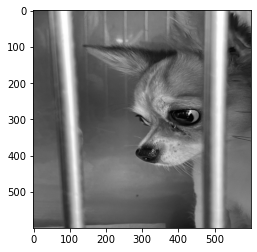

In [157]:
sample = random.choice(filenames)
print(sample)
image = load_img("./grayImages600/"+sample)
plt.imshow(image)

# -------------------------------------------------------------------------------------------------------

# Data Labeling
## -------------------------------------------------------
## train target data / size : 28x28

In [225]:
train_target = np.array(df['category'])

In [226]:
train_target

array(['3001', '3001', '3001', ..., '6022', '6022', '6022'], dtype=object)

In [227]:
train_target = train_target.astype('uint8')

In [228]:
train_target

array([185, 185, 185, ..., 134, 134, 134], dtype=uint8)

In [229]:
print('dtype : ' ,train_target.dtype)
print('type : ', type(train_target))
print('shape : ', train_target.shape)
print('unique : ', np.unique(train_target, return_counts=True))

dtype :  uint8
type :  <class 'numpy.ndarray'>
shape :  (7998,)
unique :  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8), array([31, 62, 31, 62, 31, 62, 31, 62, 31, 62, 31, 62, 3

# -------------------------------------------------------------------------------------------------------

# 1개 짜리 데이터 삭제
## 삭제 대상

deleteTarget = []

targetNumber = (np.unique(train_target, return_counts=True))[0]
countes = (np.unique(train_target, return_counts=True))[1]

for i in range(0, len(countes)):
    if countes[i] == 1:
        deleteTarget.append(targetNumber[i])

print(deleteTarget)

## 삭제

for i in range(0, len(countes)):
    if countes[i] == 1:
        if os.path.isfile('./grayImages600/' + targetNumber[i] + '(1).png'):
            os.remove('./grayImages600/' + targetNumber[i] + '(1).png')

fileList = os.listdir('./grayImages600/')
totalFileCount = 0
for file in fileList:
    totalFileCount += 1
    
print(totalFileCount)

# -------------------------------------------------------------------------------------------------------

# train input data

In [230]:
train_input = []

In [231]:
filenames = os.listdir("./grayImages600/")
for filename in filenames:
    train_input.append( np.array(Image.open('./grayImages600/' + filename)) )

In [232]:
train_input = np.array(train_input)

In [233]:
train_input

array([[[ 58,  57,  57, ...,  70,  69,  71],
        [ 61,  57,  56, ...,  73,  69,  68],
        [ 60,  59,  57, ...,  72,  72,  72],
        ...,
        [150, 142, 139, ...,  85,  81,  81],
        [223, 215, 207, ...,  87,  89,  87],
        [245, 250, 251, ...,  84,  89,  90]],

       [[ 58,  57,  57, ...,  70,  69,  71],
        [ 61,  57,  56, ...,  73,  69,  68],
        [ 60,  59,  57, ...,  72,  72,  72],
        ...,
        [150, 142, 139, ...,  85,  81,  81],
        [223, 215, 207, ...,  87,  89,  87],
        [245, 250, 251, ...,  84,  89,  90]],

       [[ 58,  57,  57, ...,  70,  69,  71],
        [ 61,  57,  56, ...,  73,  69,  68],
        [ 60,  59,  57, ...,  72,  72,  72],
        ...,
        [150, 142, 139, ...,  85,  81,  81],
        [223, 215, 207, ...,  87,  89,  87],
        [245, 250, 251, ...,  84,  89,  90]],

       ...,

       [[ 86,  88,  91, ...,  96,  97,  98],
        [ 91,  91,  99, ...,  95,  97,  99],
        [ 83,  83,  92, ...,  94,  97,  99

In [234]:
print(train_input.shape)

(7998, 600, 600)


# -------------------------------------------------------------------------------------------------------

# Data Normalization 

In [235]:
train_scaled = ()

In [236]:
train_scaled = train_input.reshape(-1, 600, 600, 1) / 255.0

In [237]:
print(train_scaled)

[[[[0.22745098]
   [0.22352941]
   [0.22352941]
   ...
   [0.2745098 ]
   [0.27058824]
   [0.27843137]]

  [[0.23921569]
   [0.22352941]
   [0.21960784]
   ...
   [0.28627451]
   [0.27058824]
   [0.26666667]]

  [[0.23529412]
   [0.23137255]
   [0.22352941]
   ...
   [0.28235294]
   [0.28235294]
   [0.28235294]]

  ...

  [[0.58823529]
   [0.55686275]
   [0.54509804]
   ...
   [0.33333333]
   [0.31764706]
   [0.31764706]]

  [[0.8745098 ]
   [0.84313725]
   [0.81176471]
   ...
   [0.34117647]
   [0.34901961]
   [0.34117647]]

  [[0.96078431]
   [0.98039216]
   [0.98431373]
   ...
   [0.32941176]
   [0.34901961]
   [0.35294118]]]


 [[[0.22745098]
   [0.22352941]
   [0.22352941]
   ...
   [0.2745098 ]
   [0.27058824]
   [0.27843137]]

  [[0.23921569]
   [0.22352941]
   [0.21960784]
   ...
   [0.28627451]
   [0.27058824]
   [0.26666667]]

  [[0.23529412]
   [0.23137255]
   [0.22352941]
   ...
   [0.28235294]
   [0.28235294]
   [0.28235294]]

  ...

  [[0.58823529]
   [0.55686275]
   [0.5

In [238]:
print(train_scaled.shape)

(7998, 600, 600, 1)


# Data Split

In [239]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [244]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(6398, 600, 600, 1) (6398,)
(1600, 600, 600, 1) (1600,)


# CNN

In [245]:
from tensorflow import keras

In [246]:
model_CNN = keras.Sequential()

model.evaluate(val_scaled, val_target)

# ************ breakpoint ************

# Feature Extraction

In [247]:
model_CNN.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(600, 600, 1)))
model_CNN.add(keras.layers.MaxPooling2D(2))
model_CNN.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D(2))
model_CNN.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D(2))
model_CNN.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D(2))

# Classifier

In [248]:
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(100, activation='relu'))
model_CNN.add(keras.layers.Dropout(0.4))
model_CNN.add(keras.layers.Dense(258, activation='softmax'))

# ************ breakpoint ************

# -------------------------------------------------------------------------------------------------------

In [249]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 600, 600, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 300, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 150, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 128)      0

keras.utils.plot_model(model_CNN)

keras.utils.plot_model(model_CNN, show_shapes=True)

In [254]:
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model_CNN.fit(train_scaled, train_target, epochs=30, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
200/200 [==============================] - 1690s 8s/step - loss: 4.4953 - accuracy: 0.1224 - val_loss: 2.0209 - val_accuracy: 0.6394
Epoch 2/30
200/200 [==============================] - 2917s 15s/step - loss: 2.2379 - accuracy: 0.4792 - val_loss: 1.1477 - val_accuracy: 0.7987
Epoch 3/30
200/200 [==============================] - 1755s 9s/step - loss: 1.6741 - accuracy: 0.5727 - val_loss: 1.0335 - val_accuracy: 0.8163
Epoch 4/30
200/200 [==============================] - 1674s 8s/step - loss: 1.3886 - accuracy: 0.6310 - val_loss: 0.9442 - val_accuracy: 0.8263
Epoch 5/30
200/200 [==============================] - 1647s 8s/step - loss: 1.2356 - accuracy: 0.6546 - val_loss: 1.0011 - val_accuracy: 0.8231
Epoch 6/30
200/200 [==============================] - 1654s 8s/step - loss: 1.1352 - accuracy: 0.6797 - val_loss: 0.9378 - val_accuracy: 0.8331
Epoch 7/30
200/200 [==============================] - 1638s 8s/step - loss: 1.0256 - accuracy: 0.7087 - val_loss: 0.9446 - val_accuracy

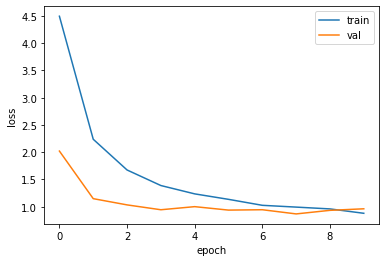

In [255]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [263]:
model_CNN2 = keras.models.load_model('./best-cnn-model.h5')
model_CNN2.evaluate(val_scaled, val_target)

50/50 [==============================] - 105s 2s/step - loss: 0.9617 - accuracy: 0.8462


[0.9617312550544739, 0.8462499976158142]

# Test
## y_train first data ↓↓↓

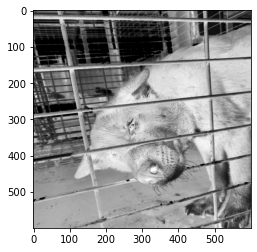

In [264]:
plt.imshow(val_scaled[0].reshape(600, 600), cmap='gray_r')
plt.show()

# Performance

# 위 사진에 대한 258개 확률 출력

In [265]:
preds = model_CNN2.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 172ms/step
[[2.30348509e-14 1.58603299e-07 1.01048352e-15 1.35303103e-14
  6.01580211e-18 1.48823587e-09 9.95023427e-14 9.92253762e-12
  7.98398236e-09 3.57402429e-16 1.34971035e-19 6.25333507e-10
  4.36747062e-18 1.18913243e-17 4.66636262e-19 4.50394583e-17
  2.46631518e-22 5.29747144e-20 1.16675320e-21 8.91354158e-16
  6.66400562e-22 1.94519987e-19 8.35280278e-21 3.37674331e-21
  1.27088456e-19 4.96184663e-18 2.03977214e-20 3.45890991e-18
  5.56233826e-22 3.04436652e-14 2.78514938e-18 2.47126283e-19
  3.52353455e-21 5.35912173e-19 2.40741467e-18 2.46426969e-18
  7.21277583e-20 7.60735210e-19 1.54967751e-19 5.22937173e-18
  7.01323140e-24 2.67190323e-16 6.95663527e-17 1.51170351e-17
  1.61237353e-21 2.72187730e-18 8.84342432e-18 3.61262853e-21
  2.27456807e-19 1.32441597e-14 1.67204366e-20 2.12538501e-20
  4.29889239e-17 2.59131532e-18 2.44808485e-21 1.09608408e-21
  4.58944619e-19 4.23491236e-23 1.90465408e-18 4.45022911e-19
  6.39416430e-20 

# 확률 그래프

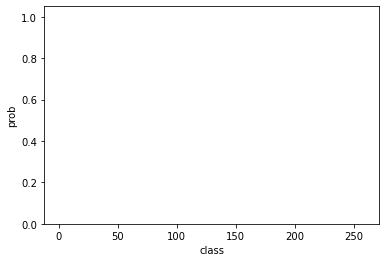

In [266]:
plt.bar(range(1, 259), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

# Total target (classes) < append

In [267]:
classes = []
for i in df['category'].unique():
    classes.append(i)

# 위 사진의 target

In [268]:
import numpy as np
print(classes[np.argmax(preds)])

4083


In [269]:
acc = model_CNN2.evaluate(val_scaled, val_target)

50/50 [==============================] - 105s 2s/step - loss: 0.9617 - accuracy: 0.8462


In [270]:
print("Accuracy : {:.2f}%".format(acc[1]*100))

Accuracy : 84.62%
